In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# LHS
from smt.sampling_methods import LHS

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/temp_0608_experimentsWithJoints/'
replicate='lc_nsms_8_6_13-23-13-3161/'
filename='MD_Cart_WDH.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)
AREPuckFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+filename
AREPotatoFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+filename
ARETricycleFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+filename
oAllFile='kClusterListAll.csv'
oBestFile='kClusterListBest.csv'
oLHSFile='LHS.csv'

Filepath: /home/ebb505/ARE_Project/are-logs/temp_0608_experimentsWithJoints/lc_nsms_8_6_13-23-13-3161/MD_Cart_WDH.csv


In [3]:
# Import data from csv (evolved robots)
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[1:-1]) # Last character is empty for some reason
# Import hand-made robots
my_robot = []
with open(AREPuckFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
with open(AREPotatoFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
with open(ARETricycleFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        

In [4]:
# Estimate average for each generation
population = 25
evaluations = len(my_list)
#evaluations = 22000
featureSize = len(my_list[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array
robotDat = np.array([[float(y) for y in x] for x in my_robot]) # Convert to array

Number of evaluations:  19400 Features size:  8 Generations:  776


In [5]:
print(dat[0])

[0.583333  0.583333  0.0833333 0.0138889 0.        0.        0.1
 0.       ]


In [6]:
# CLUSTERING
# Example: https://machinelearningmastery.com/clustering-algorithms-with-python/
# define the model
model = KMeans(n_clusters=25)
# fit the model
model.fit(dat)
# assign a cluster to each example
yhat = model.predict(dat)
# retrieve unique clusters
clusters = unique(yhat)

622
705
478
1222
633
646
429
299
532
705
703
885
1005
2983
1044
804
662
1075
777
719
491
669
334
432
546


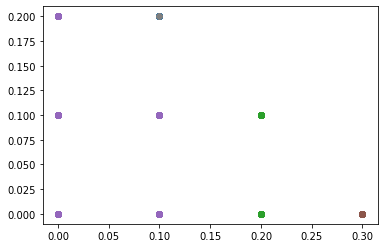

In [7]:
listOfRobots = []
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(dat[row_ix, 4], dat[row_ix, 5])
    print(len(row_ix[0]))
    listOfRobots.append(row_ix[0])
# show the plot
plt.show()

622
705
478
1222
633
646
429
299
532
705
703
885
1005
2983
1044
804
662
1075
777
719
491
669
334
432
546


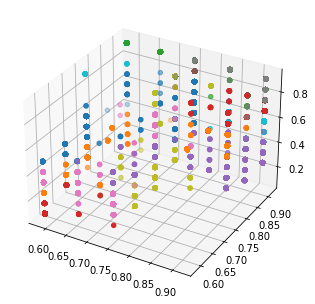

In [8]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)
listOfRobots = []
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    ax.scatter(dat[row_ix, 0], dat[row_ix, 1], dat[row_ix, 2])
    print(len(row_ix[0]))
    listOfRobots.append(row_ix[0])
# show the plot
plt.show()
fig.savefig(repository+replicate+'3DScatterHDW.png',dpi=200)

In [9]:
# Save to CSV
with open(repository + replicate + oAllFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(len(listOfRobots)):
        csv_writer.writerow(listOfRobots[i])

In [10]:
print(len(listOfRobots[0]))
print(listOfRobots[0][:5])

622
[309 325 328 329 330]


In [11]:
# Compare ALL robot excluding hand-made robots
mostSparseList = []
for i in range(len(listOfRobots)):
    temAve = []
    for j in range(len(listOfRobots[i])):
        temDis = []
        print(j/len(listOfRobots[i]))
        for k in range(len(listOfRobots[i])):
            dist = np.linalg.norm(dat[listOfRobots[i][j]][1:]-dat[listOfRobots[i][k]][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
        clear_output(wait=True)
    for j in range(len(temAve)):
            if temAve[j] == max(temAve):
                print(j, ': ', listOfRobots[i][j])
                mostSparseList.append(listOfRobots[i][j])
                break

508 :  18849


In [27]:
print(len(temAve))
print(max(temAve))

716
0.11692745459424024


In [38]:
for i in range(len(temAve)):
    if temAve[i] == max(temAve):
        print(i, ': ', listOfRobots[0][i])

198 :  14021


In [56]:
print(len(listOfRobots))
print(len(mostSparseList))
print(mostSparseList)

25
25
[14021, 1091, 220, 14044, 6227, 9594, 2366, 3206, 2408, 3349, 5845, 2736, 883, 2285, 5799, 15808, 6128, 6438, 18849, 16527, 18940, 2391, 7476, 17711, 9719]


In [55]:
# Save to CSV
with open(repository + replicate + oBestFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    csv_writer.writerow(mostSparseList)

In [2]:
xlimits = np.array([[0, 20000]])
sampling = LHS(xlimits=xlimits)

num = 25
x = sampling(num)

In [3]:
print(x)

[[11600.]
 [14800.]
 [10000.]
 [19600.]
 [18000.]
 [ 2000.]
 [18800.]
 [17200.]
 [ 2800.]
 [ 6000.]
 [10800.]
 [ 4400.]
 [ 6800.]
 [ 3600.]
 [15600.]
 [ 8400.]
 [  400.]
 [ 9200.]
 [ 7600.]
 [ 1200.]
 [13200.]
 [ 5200.]
 [12400.]
 [14000.]
 [16400.]]


In [6]:
# Save to CSV
with open(repository + replicate + oLHSFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(len(x)):
        csv_writer.writerow(x[i])